In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sphere_function(decision):
    return sum(np.square(decision))

In [3]:
def generate_trials(step_size, starting_point):
        
    n_dimensions = len(starting_point)
    trial_templates = (2 * n_dimensions) * [starting_point]
    
    trials = []
    
    position, dimension_counter = 0, 0

    for idx, trial in enumerate(trial_templates):

        new_trial = []

        for decision_position in range(0, len(trial)):
            if decision_position == position:
                new_trial.append(trial[decision_position] + step_size)
            else:
                new_trial.append(trial[decision_position])

            dimension_counter = dimension_counter + 1

        step_size = -1 * step_size
        
        if dimension_counter > n_dimensions:
            dimension_counter = 0
            position = position + 1

        trials.append(new_trial)
        
    return trials

In [4]:
def detect_best_dimension(improvements, opportunistic):
    
    best_dimension_index = len(improvements) - improvements[::-1].index(True) - 1
    
    if best_dimension_index % 2 == 0:
        best_dimension = [best_dimension_index, best_dimension_index + 1]
    else:
        best_dimension = [best_dimension_index - 1, best_dimension_index]
        
    if not opportunistic:
        best_dimension = best_dimension + list(np.where(np.array(improvements) == True)[0])
    
    return best_dimension

In [5]:
def hooke_jeeves_search(objective, 
                        objective_function, 
                        starting_point, step_size, tolerance, step_decay, 
                        opportunistic, dynamic_ordering):
    
    best_y = objective_function(starting_point)
    best_dimension = []
    
    all_trials = [] ####
    computed_trials = [] ####
    
    while step_size > tolerance:
        
        trials = generate_trials(step_size, starting_point)
        improvements = [False] * len(trials)
        
        all_trials.append(trials) ####

        if dynamic_ordering:
            iterator = list(dict.fromkeys(best_dimension + list(range(0, len(trials)))))
        else:
            iterator = range(0, len(trials))
            
        for idx in iterator:
            
            trial = trials[idx]
            
            y = objective_function(trial)
            
            computed_trials.append(trial) ####
            
            if objective == 'min':
                improvements[idx] = True if y < best_y else False
            else:
                improvements[idx] = True if y > best_y else False
            
            if improvements[idx]:
                best_y = y
                best_x = trial
                starting_point = best_x

                if opportunistic:
                    break
                
        if np.sum(improvements) == 0:
            step_size = step_size * step_decay
        elif dynamic_ordering:
            best_dimension = detect_best_dimension(improvements, opportunistic)
        
    return best_y, best_x, all_trials, computed_trials

In [6]:
%%time

np.random.seed(1234)

objective = 'min'
objective_function = sphere_function

low = -50
high = 50

# starting_point = np.random.randint(low, high=high, size=2)
starting_point = [-68, -60]
step_size = 20
tolerance = .5
step_decay = .2
opportunistic = True
dynamic_ordering = True

best_y, best_x, all_trials, computed_trials = hooke_jeeves_search(objective, objective_function, starting_point, step_size, tolerance, step_decay, opportunistic, dynamic_ordering)

Wall time: 997 µs


# Plotting

In [7]:
n_points = 100
additional = 40

x1 = np.linspace(low - additional, high + additional, n_points)
x2 = np.linspace(low - additional, high + additional, n_points)

X1, X2 = np.meshgrid(x1, x2)

In [8]:
y = []
for x1_element in list(x1):
    for x2_element in list(x2):
        y.append(sphere_function([x1_element, x2_element]))
        
y = np.array(y)

In [9]:
X1, X2 = np.meshgrid(x1, x2)
# print(X1.shape, X2.shape)
Y = y.reshape(X1.shape)

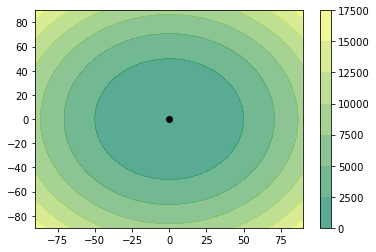

In [10]:
fig = plt.figure()
ax1 = plt.contourf(X1, X2, Y,
                  cmap ='summer',
                  alpha = .7)

plt.colorbar(ax1)

plt.scatter(best_x[0], best_x[1], c='0')
#plt.scatter(trials_x1, trials_x2, c='0')

plt.show()

In [20]:
def generate_plot_list(trials_y):
    
    best_output_y = trials_y[0]
    trials_y_plot = [best_output_y]

    for item in trials_y:
        if item < best_output_y:
            best_output_y = item
        trials_y_plot.append(best_output_y)
    
    return trials_y_plot

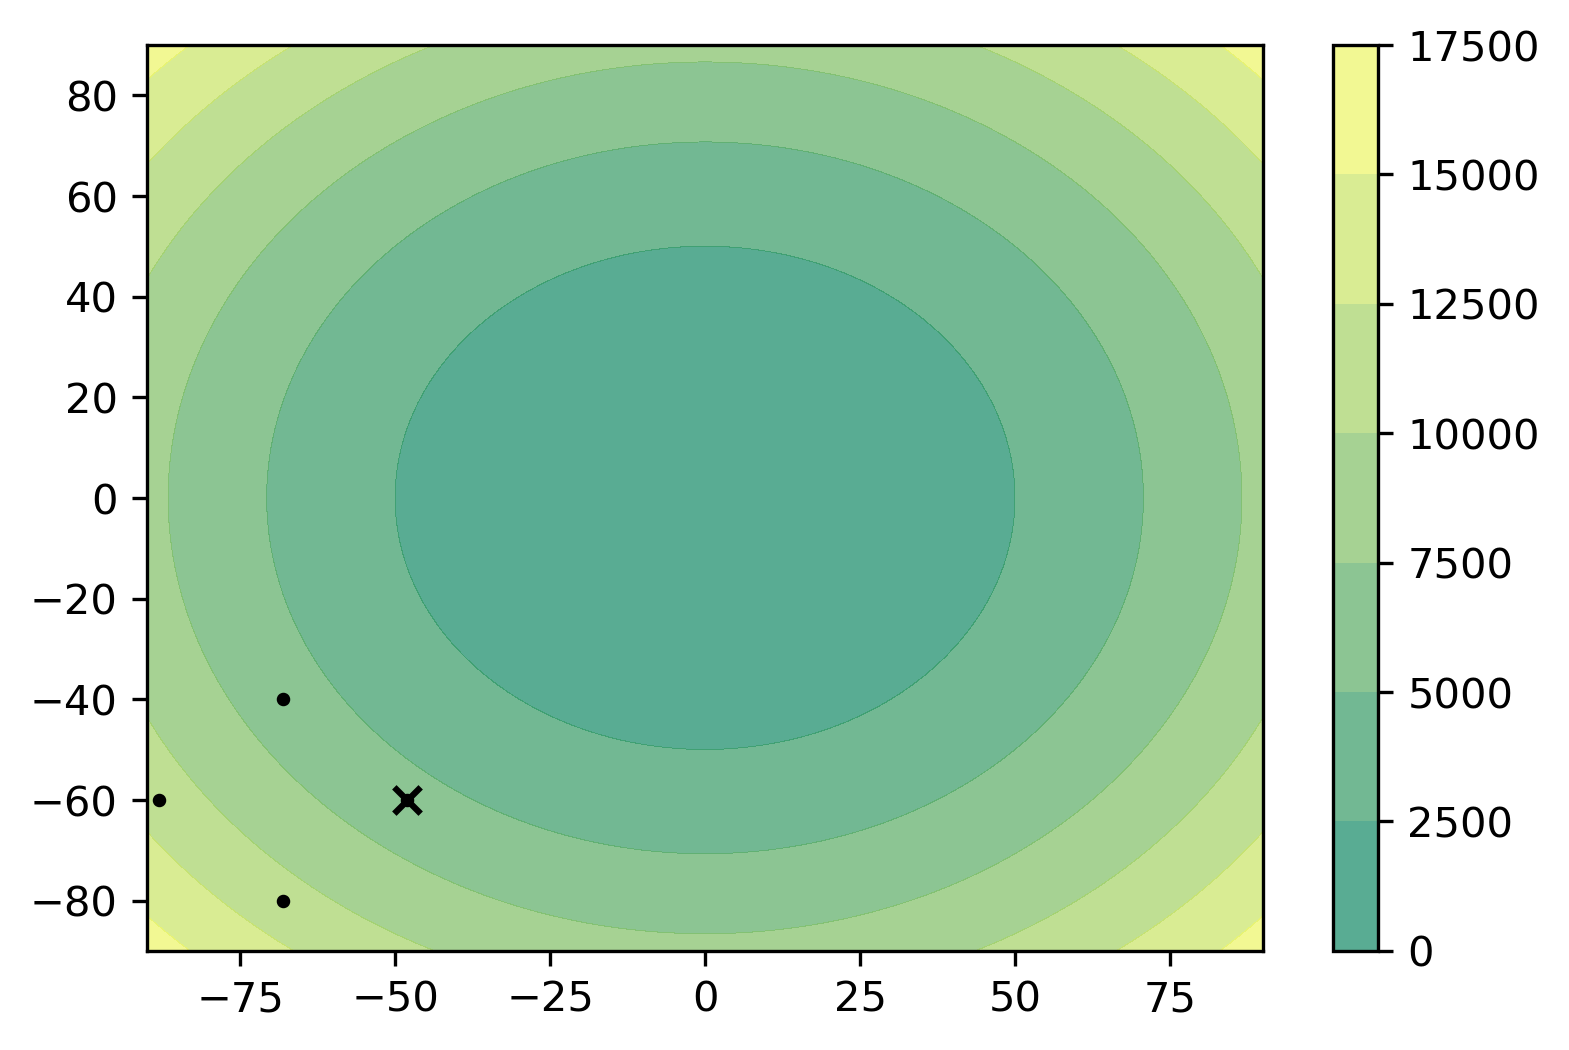

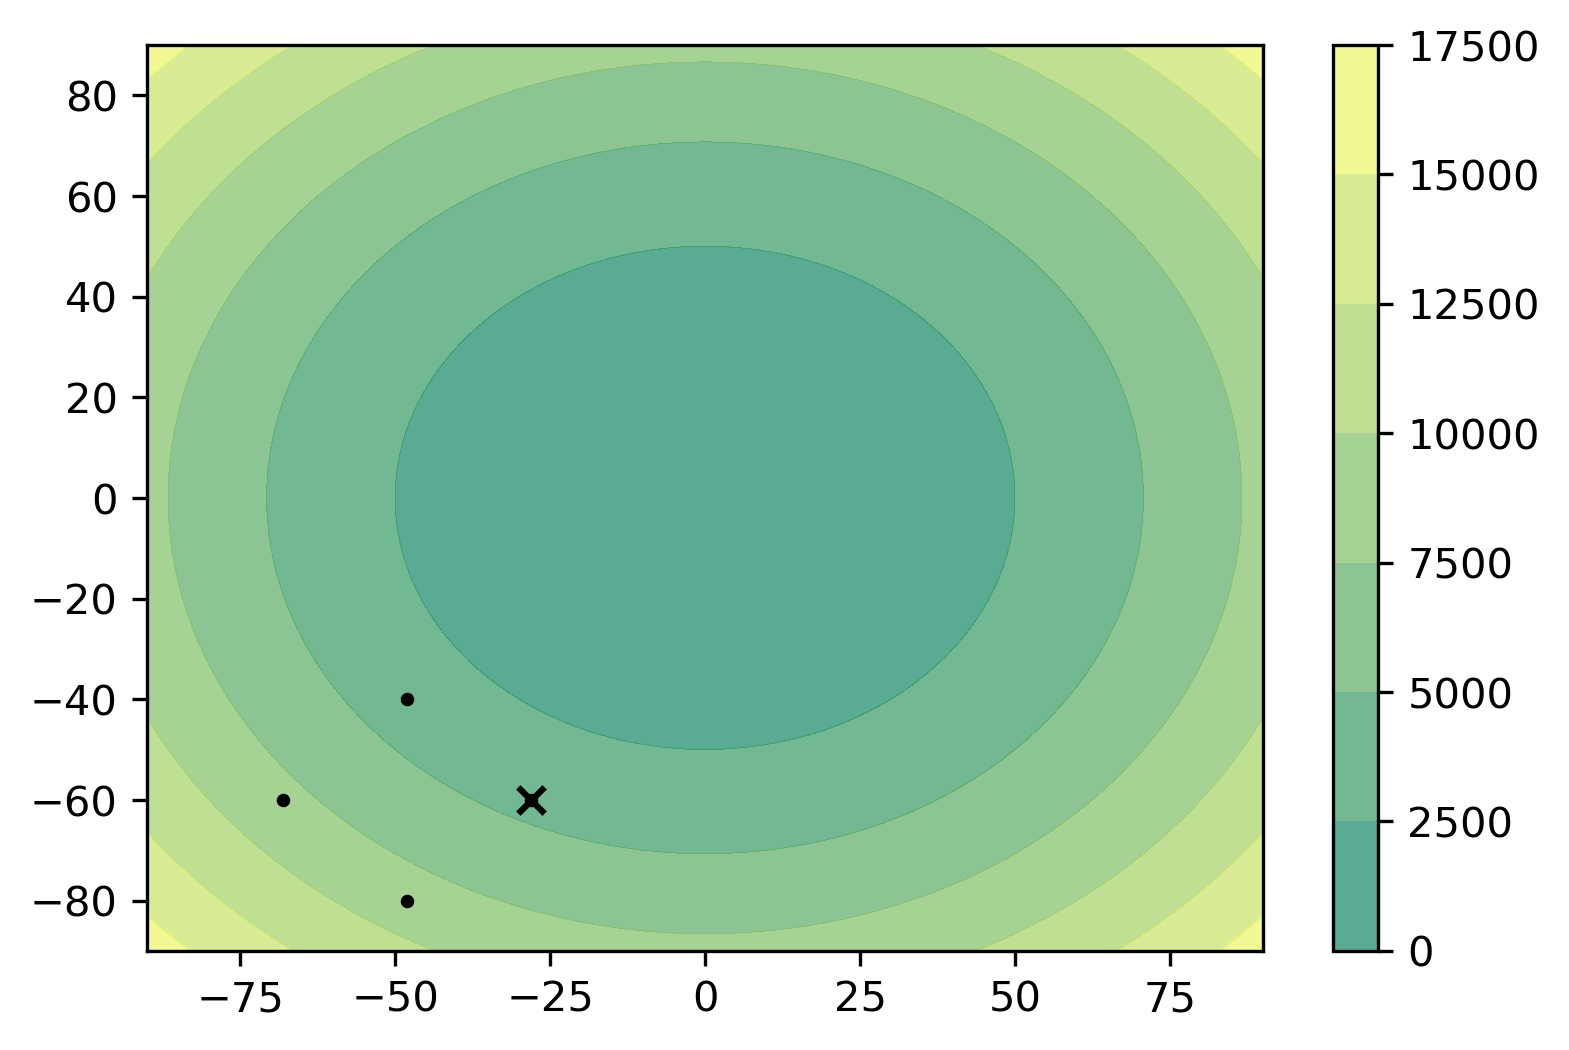

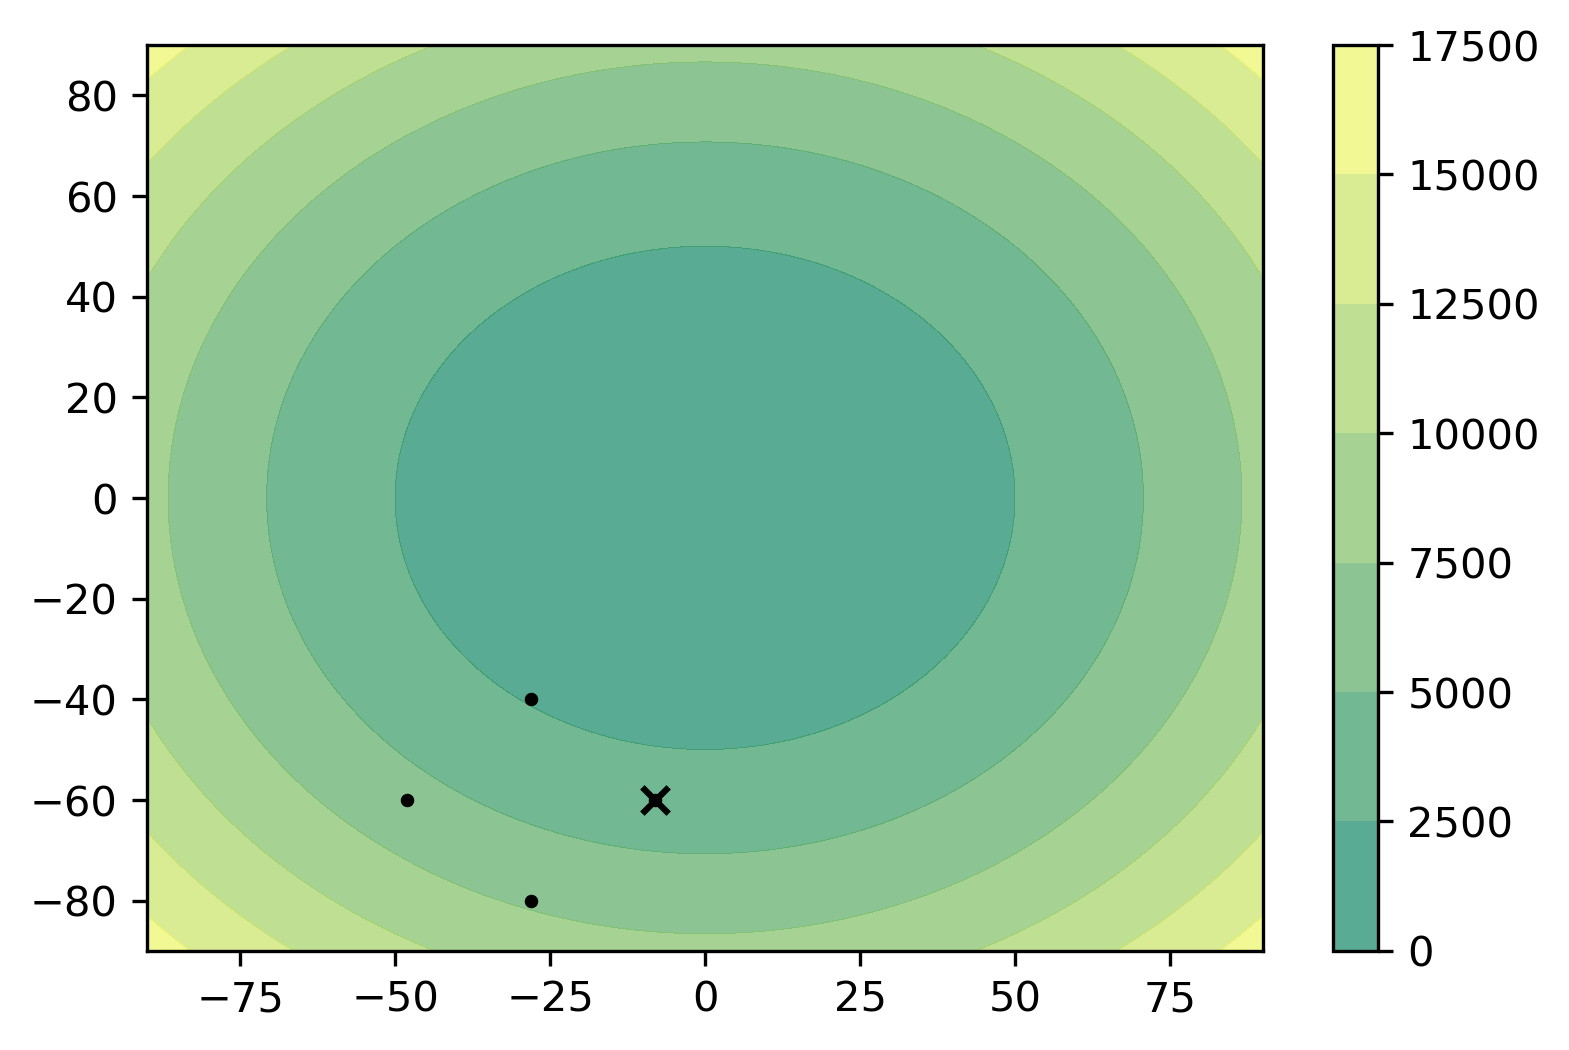

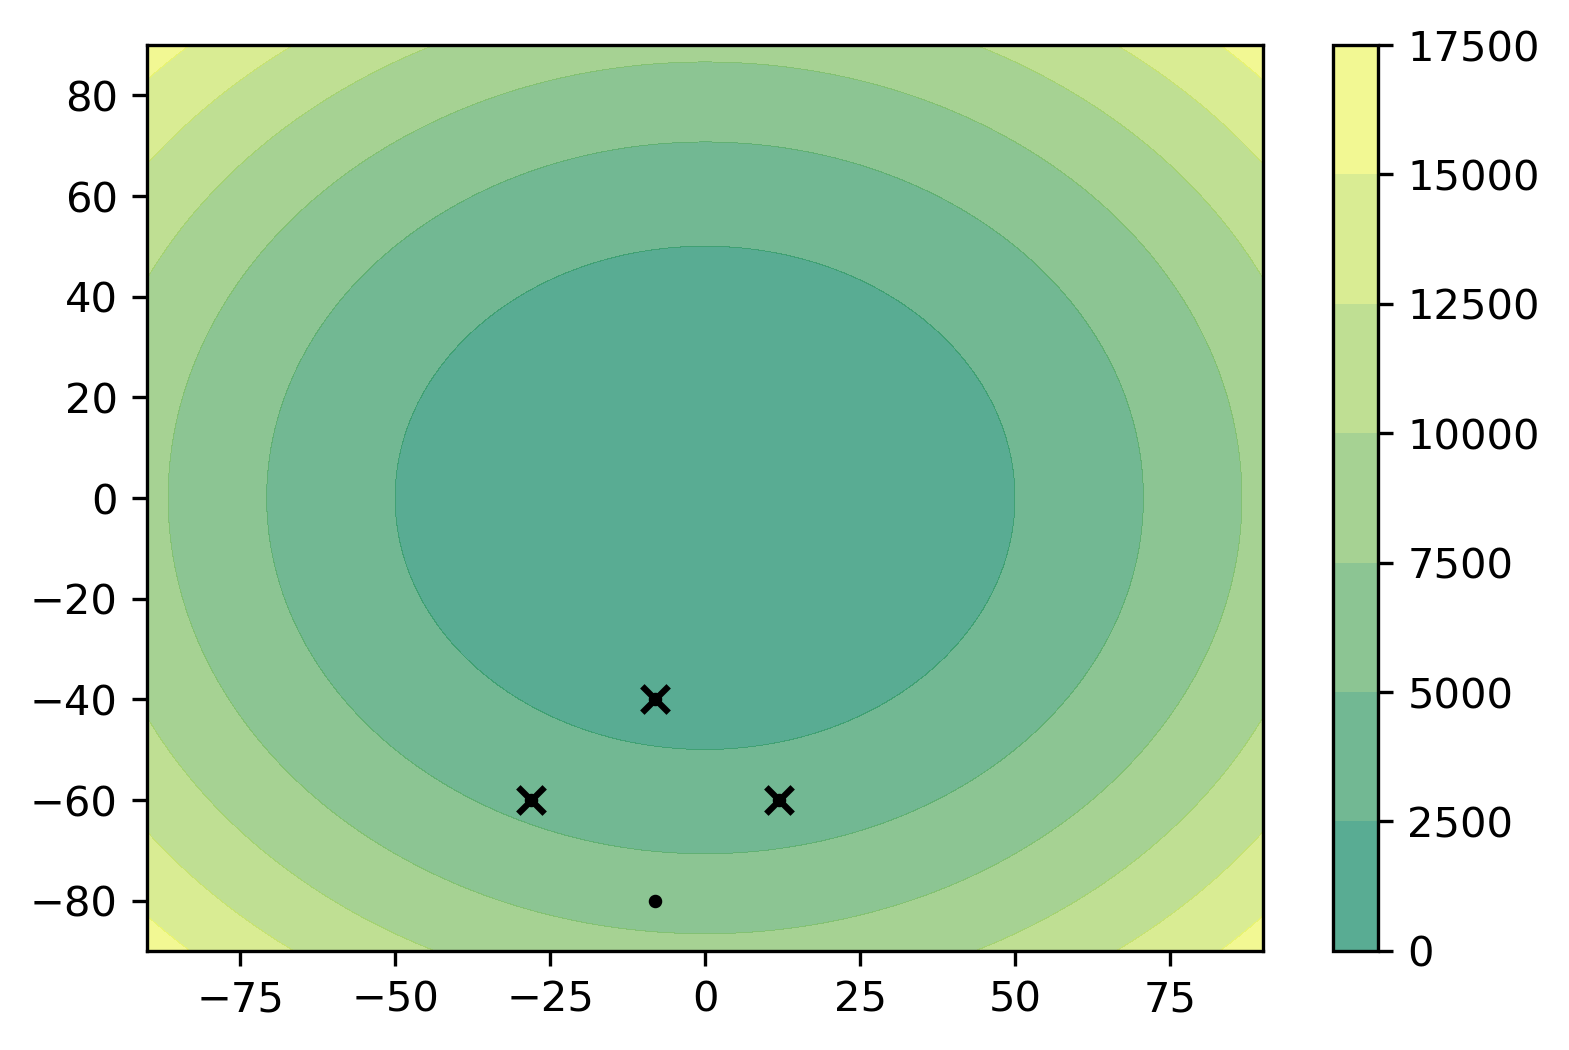

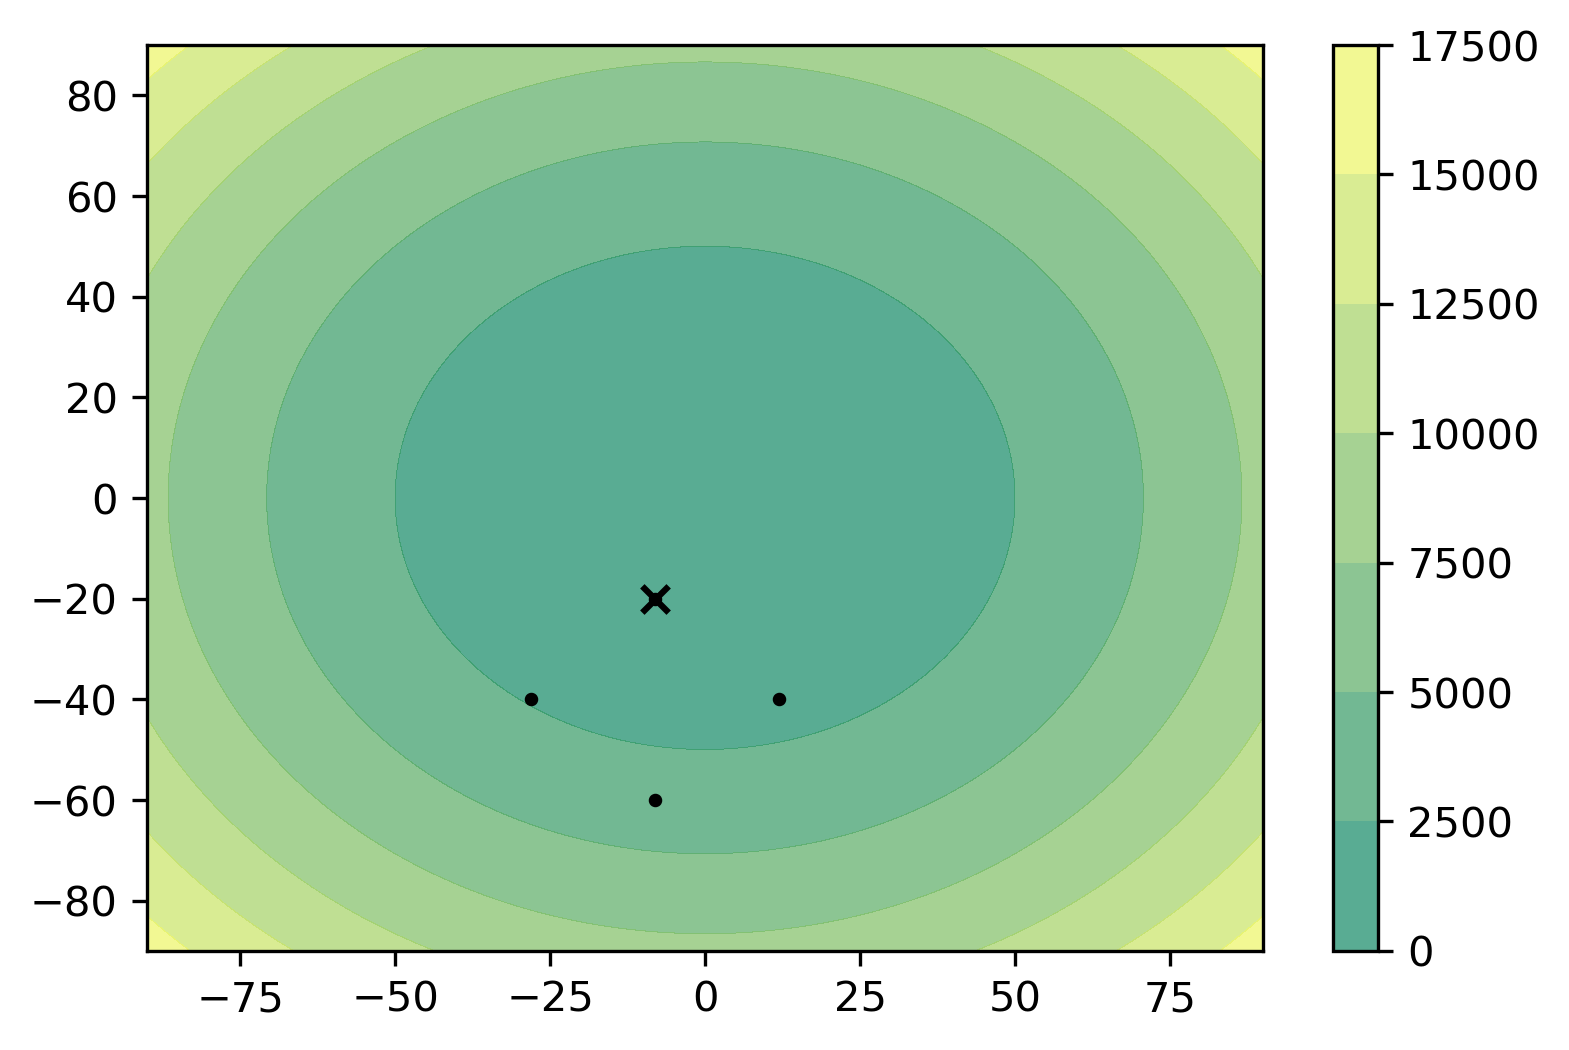

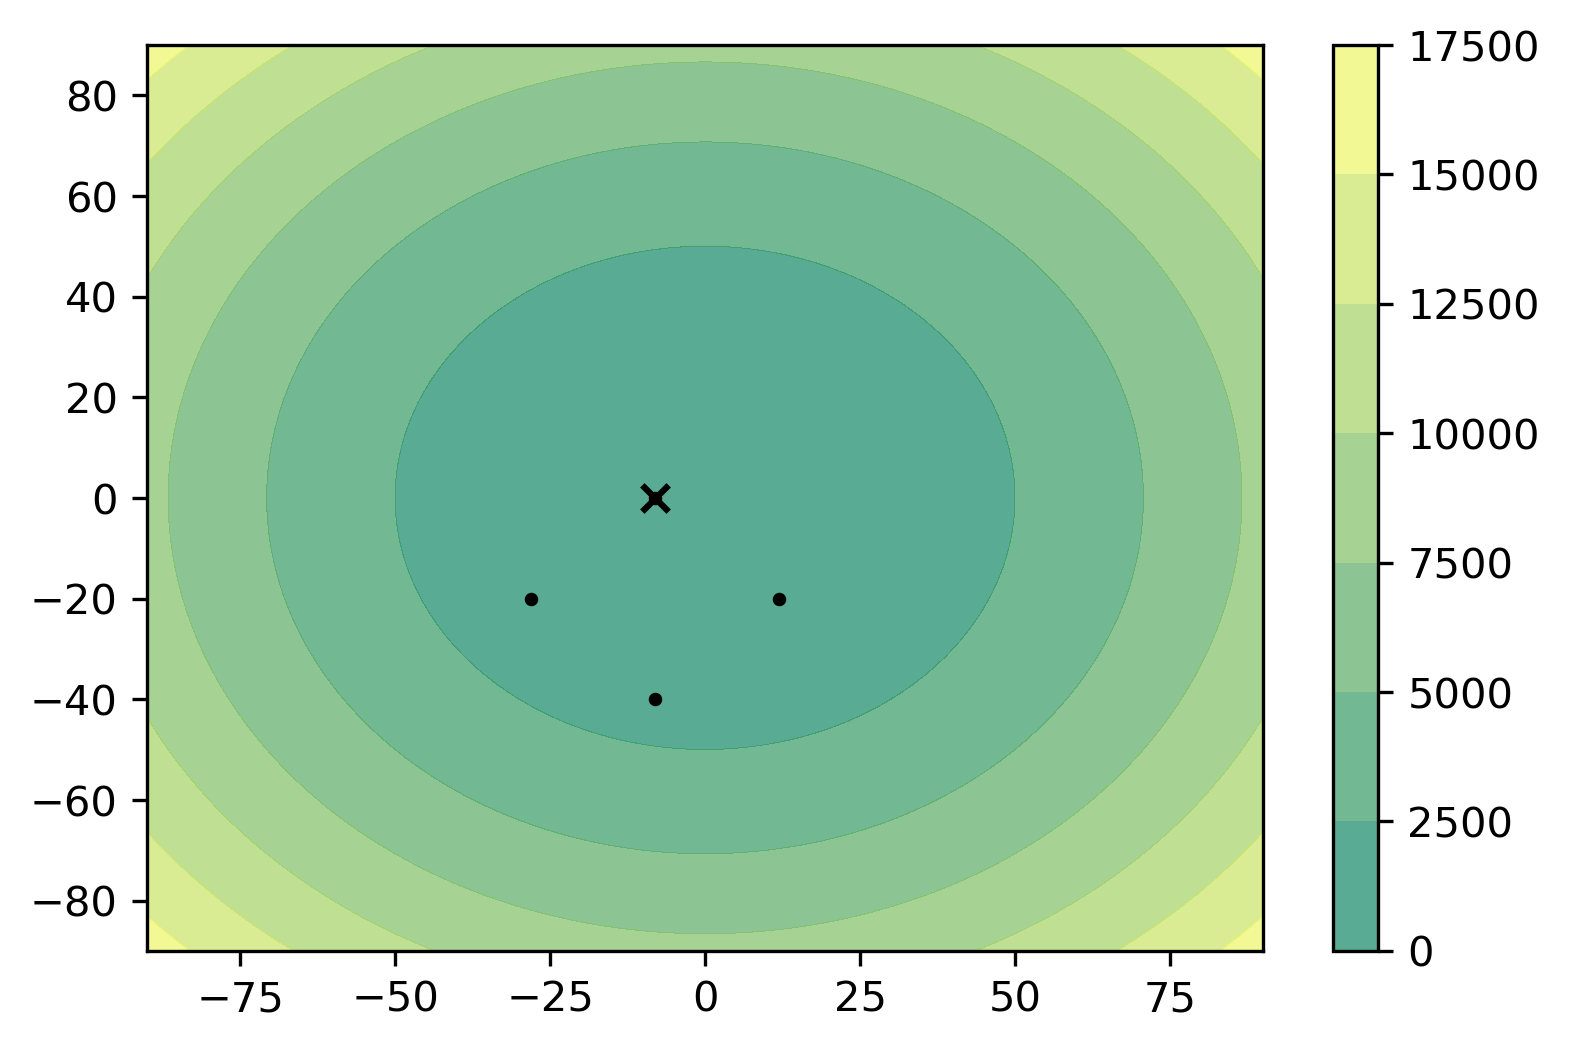

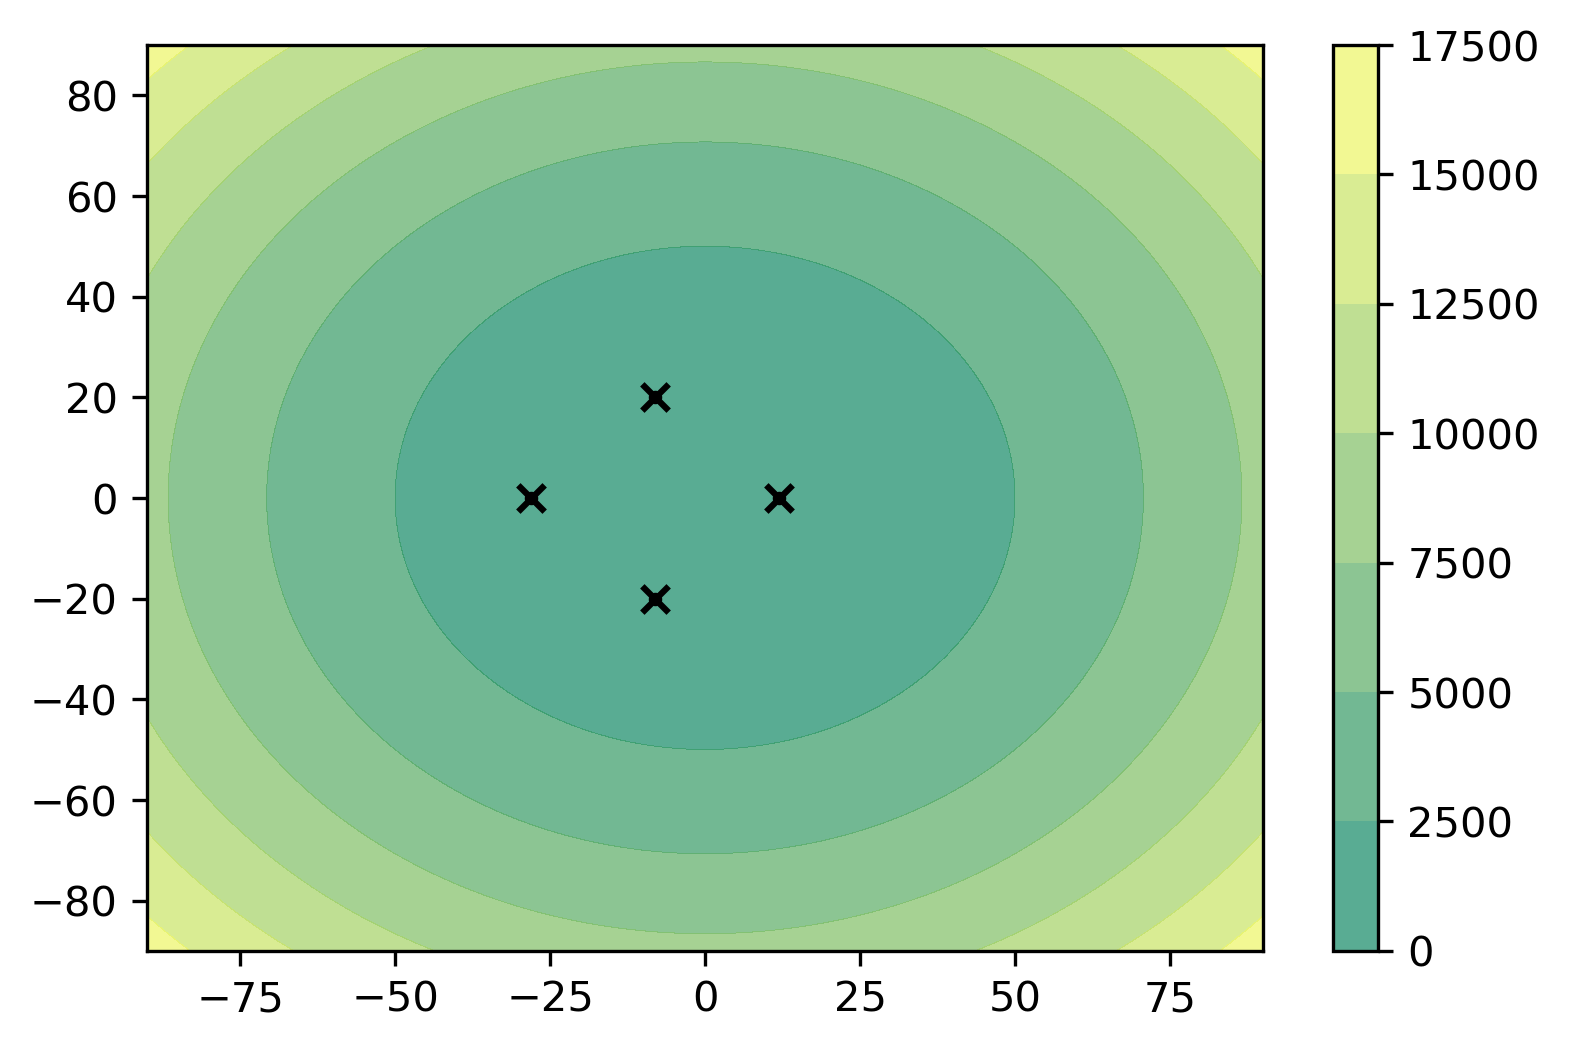

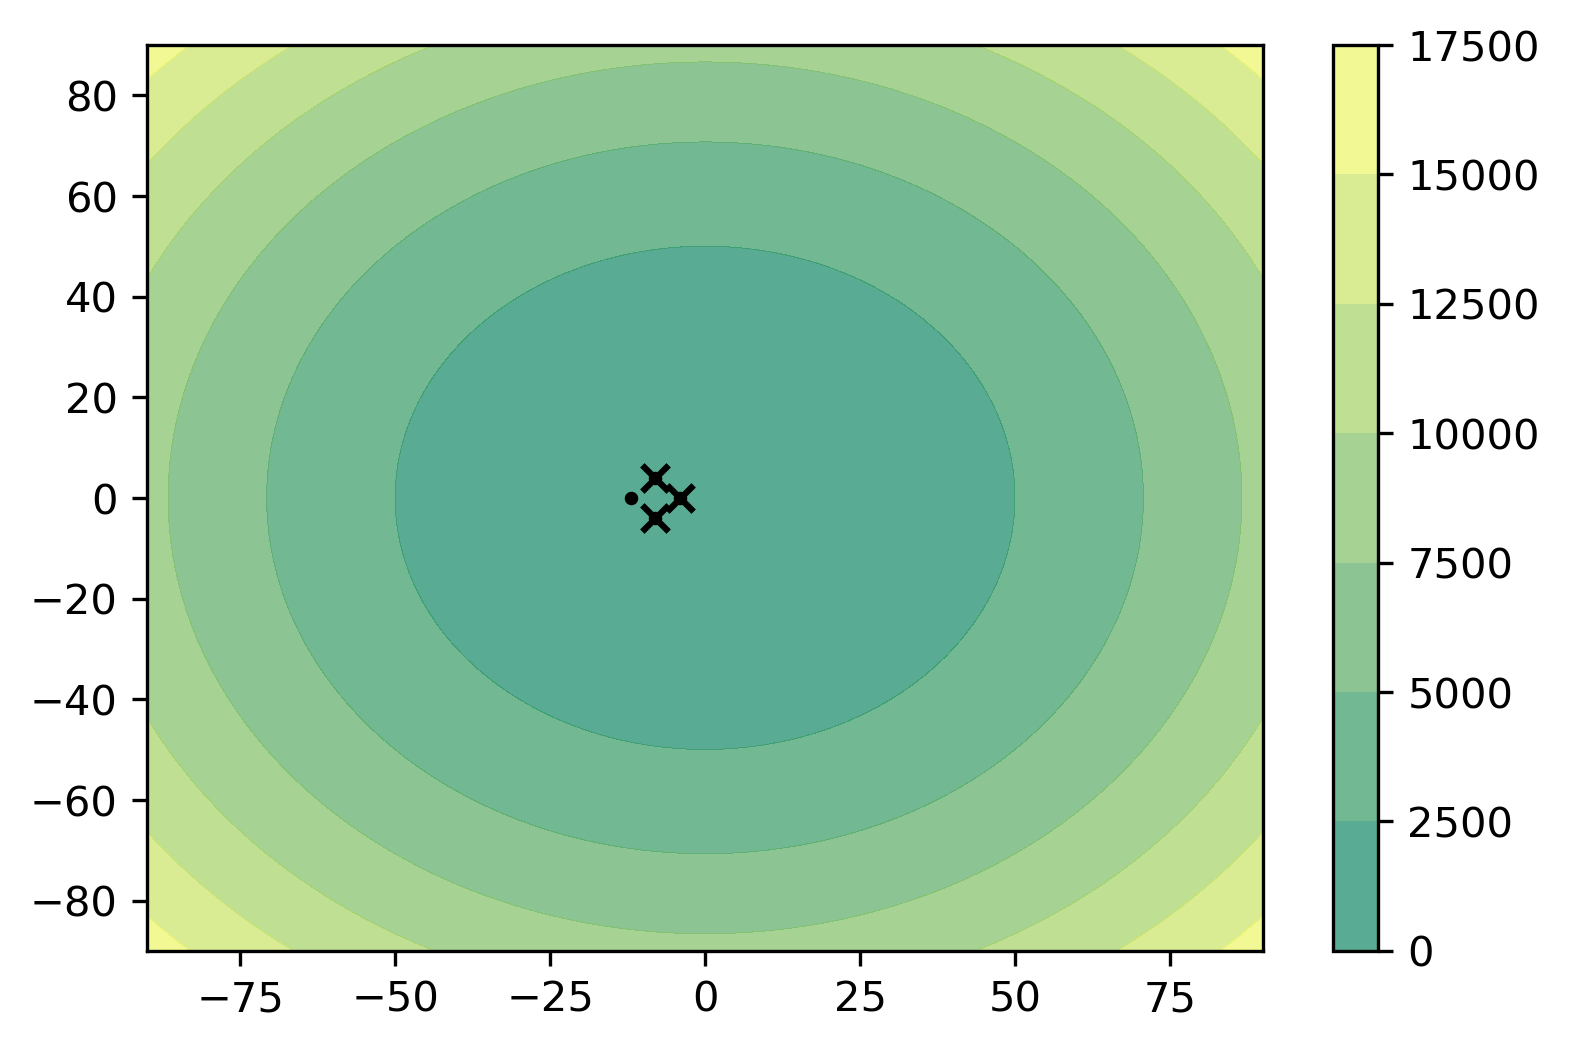

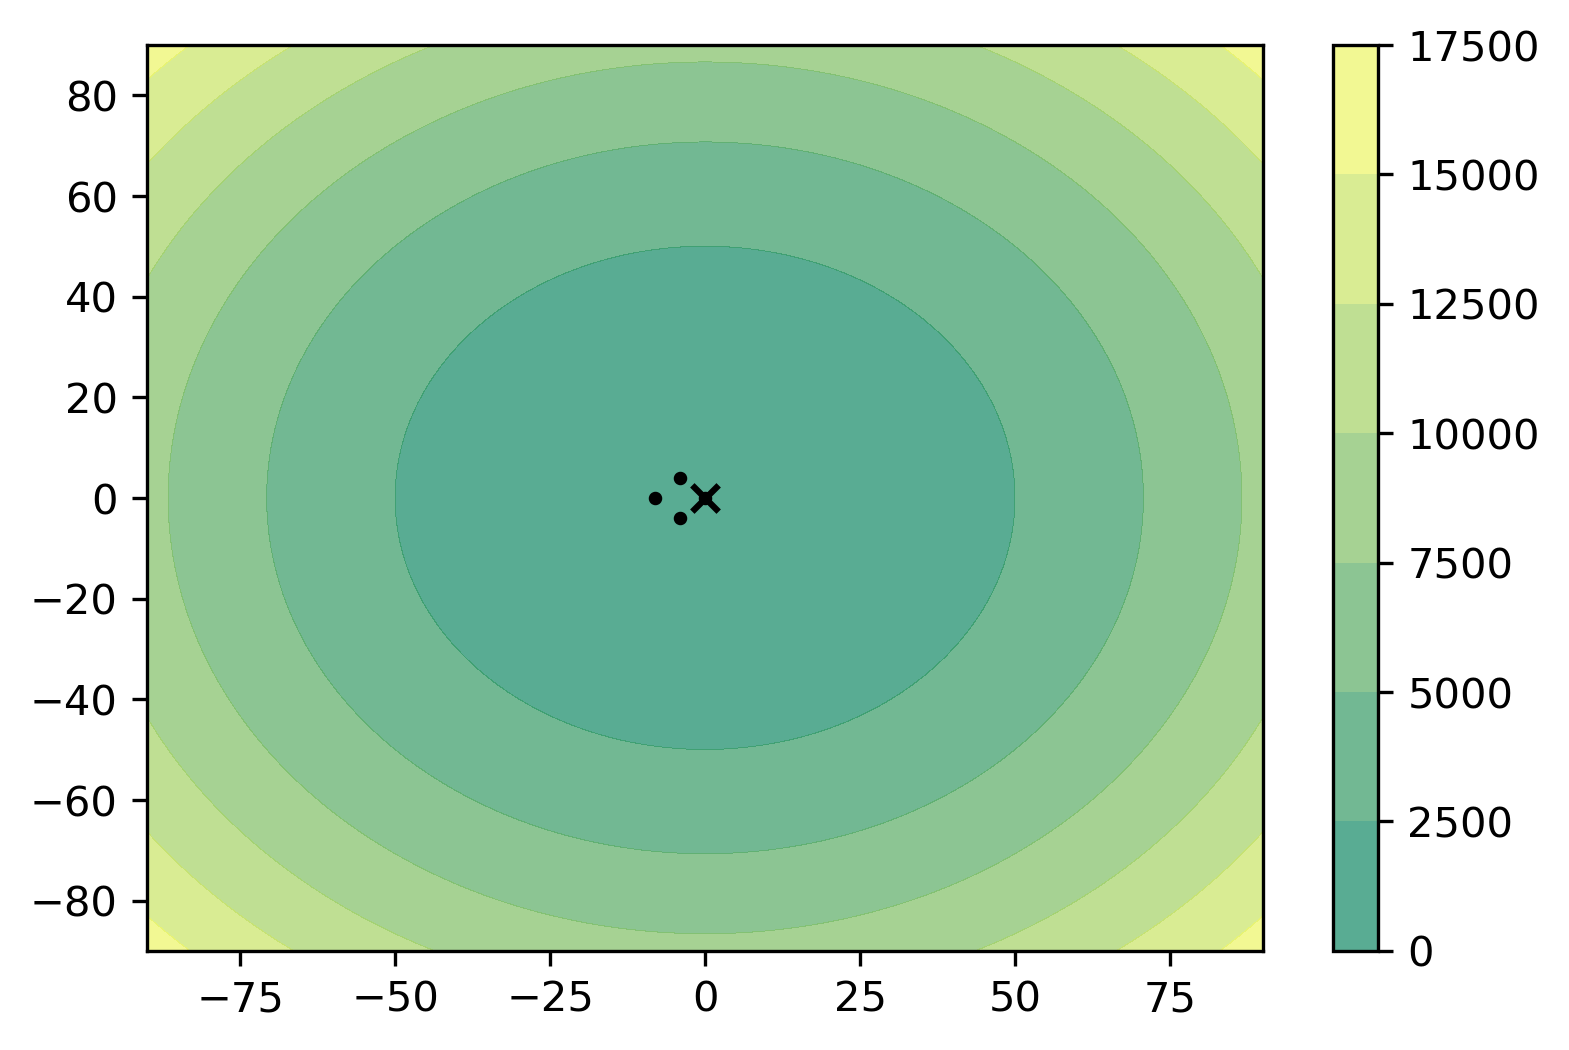

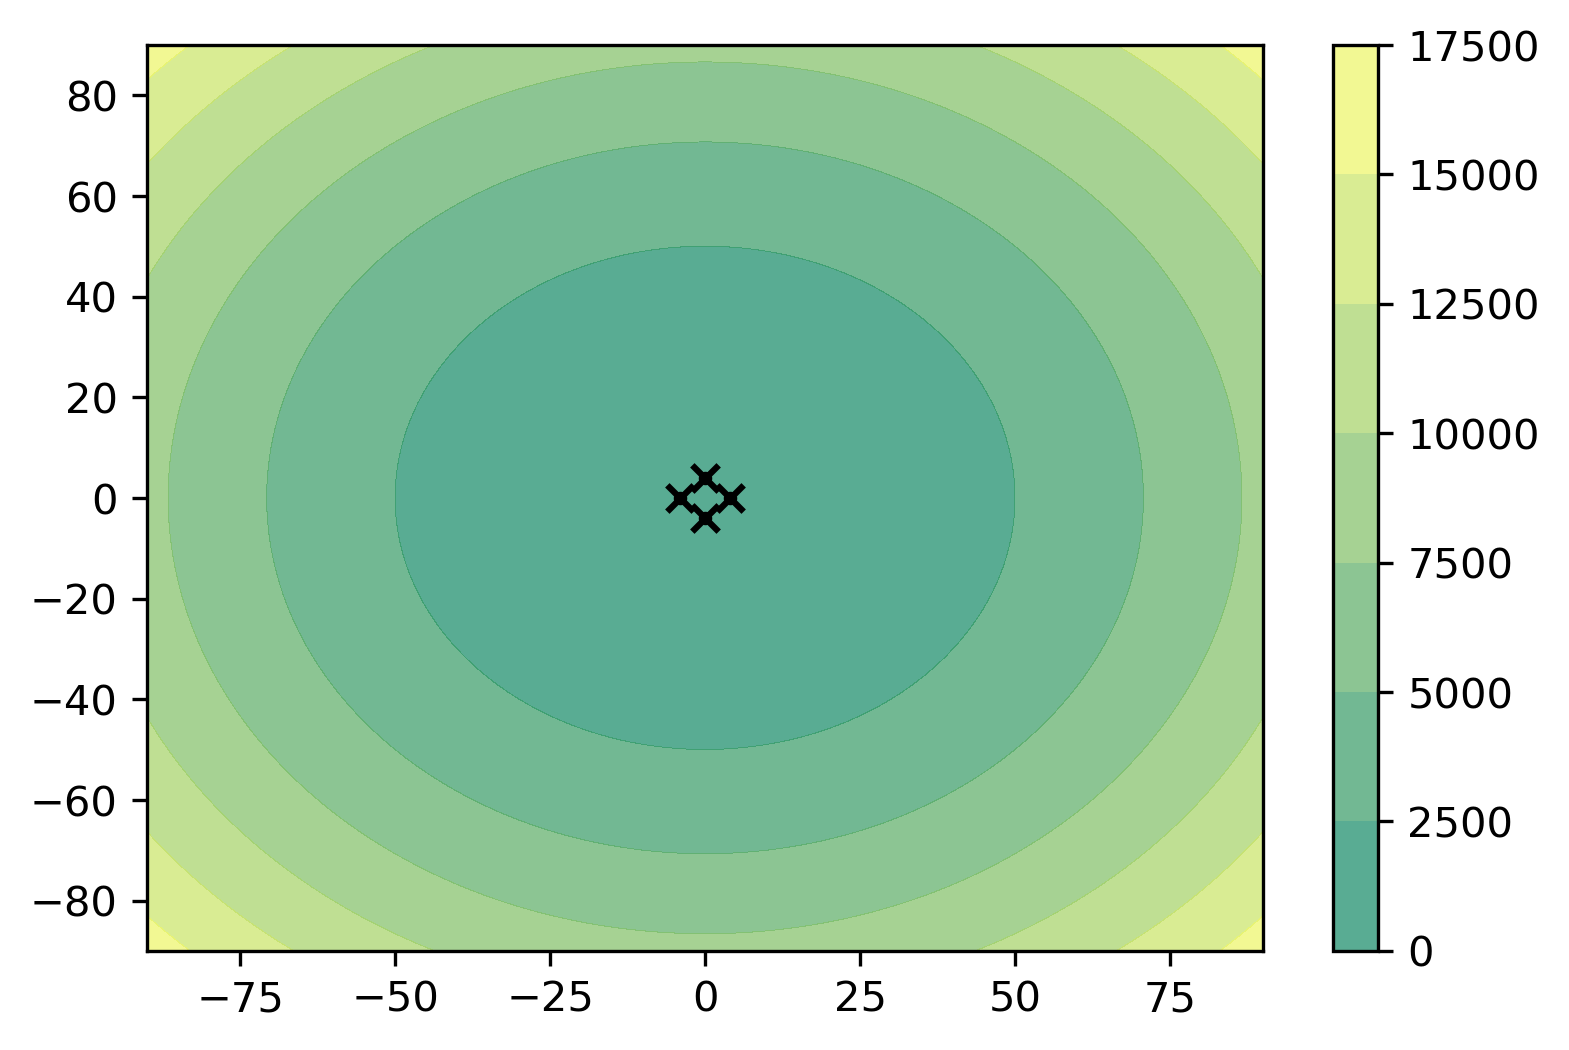

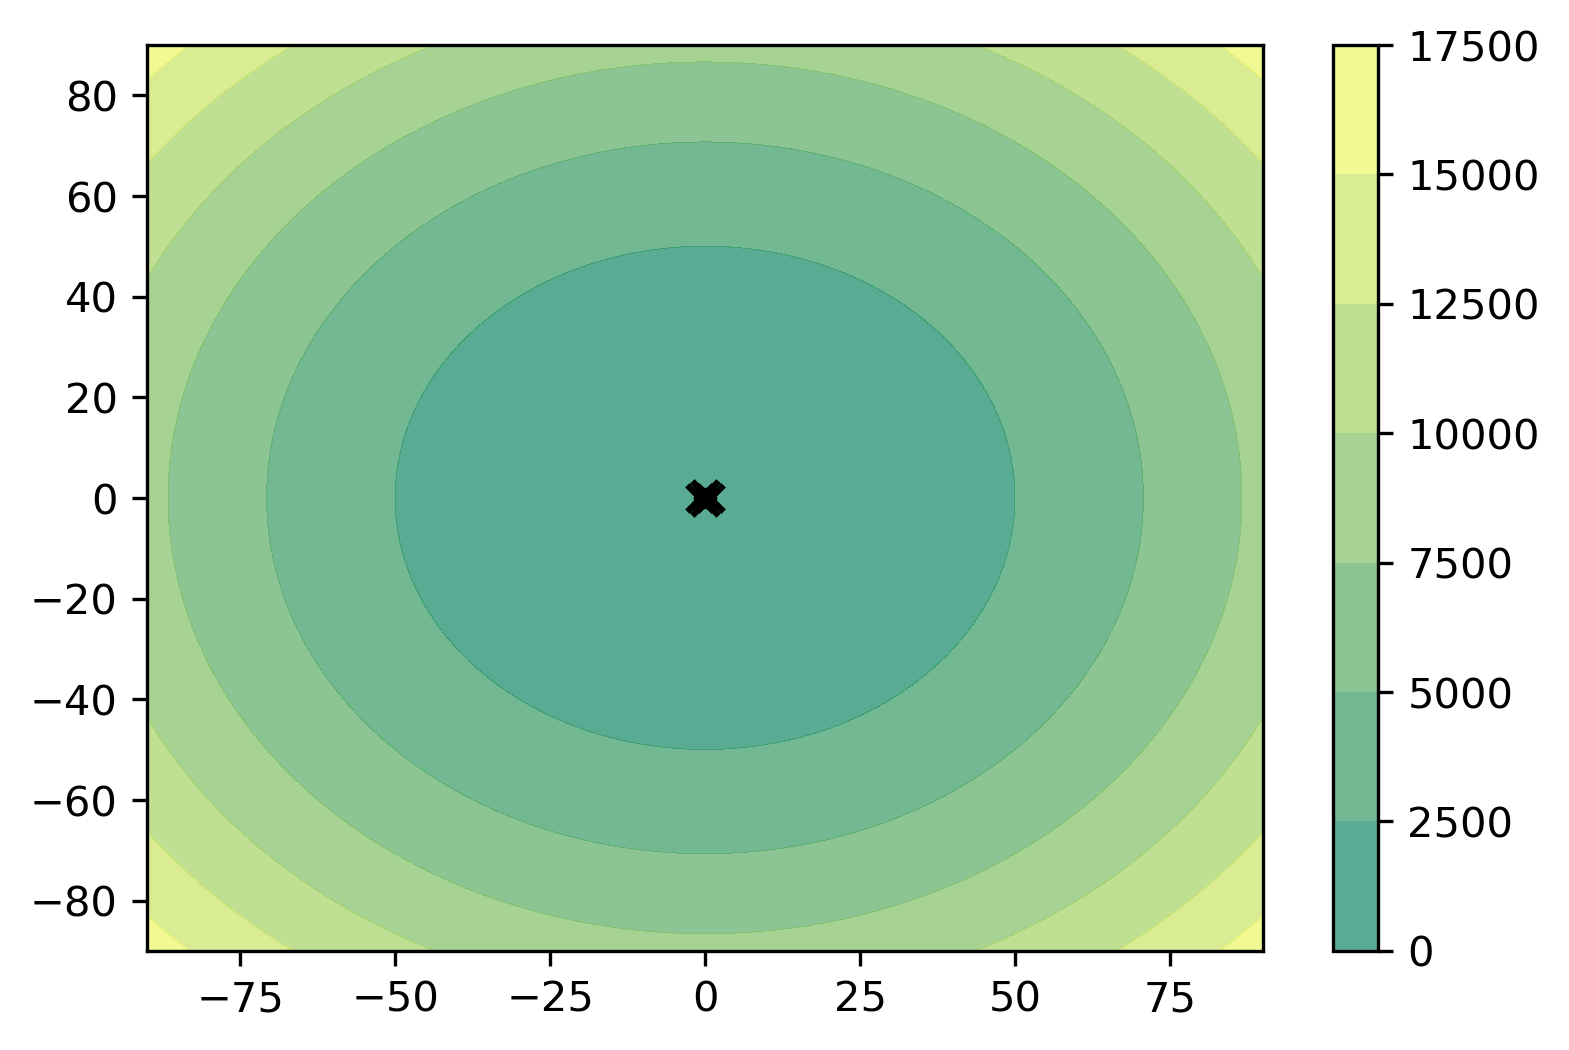

In [90]:
trials_y = [] #######
acc_trials_y = [] #######

aux_computed_trials = computed_trials.copy()

for trial_set in all_trials:
    
    fig = plt.figure()
    ax1 = plt.contourf(X1, X2, Y,
                      cmap ='summer',
                      alpha = .7)

    plt.colorbar(ax1)

    trials_x1 = np.array(trial_set)[:, 0]
    trials_x2 = np.array(trial_set)[:, 1]
        
    if opportunistic:
    
        accelerated_trials = []
        for trial in trial_set:
            if trial in aux_computed_trials:
                accelerated_trials.append(trial)
                acc_trials_y.append(sphere_function(trial)) #######
                
            trials_y.append(sphere_function(trial)) #######
        
        for trial in accelerated_trials:
            if trial in aux_computed_trials:
                aux_computed_trials.remove(trial)

        accelerated_trials_x1 = np.array(accelerated_trials)[:, 0]
        accelerated_trials_x2 = np.array(accelerated_trials)[:, 1]
        plt.scatter(accelerated_trials_x1, accelerated_trials_x2, c='0', s=40, marker='x')
        plt.scatter(trials_x1, trials_x2, c='0', s=5)
        
    else:
        plt.scatter(trials_x1, trials_x2, c='0', s=20)
    
    plt.xlim([low - additional, high + additional])
    plt.ylim([low - additional, high + additional])
    
#     plt.plot(generate_plot_list(trials_y))
#     plt.plot(generate_plot_list(acc_trials_y))
    
    plt.show()

In [89]:
import imageio
plt.rcParams['figure.dpi'] = 300

In [91]:
trials_y = [] #######
acc_trials_y = [] #######
filenames = [] #######

aux_computed_trials = computed_trials.copy()

for i, trial_set in enumerate(all_trials):
    
    fig = plt.figure()
    
    plt.subplots(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    
    ax1 = plt.contourf(X1, X2, Y,
                      cmap ='summer',
                      alpha = .7)

    plt.colorbar(ax1)

    trials_x1 = np.array(trial_set)[:, 0]
    trials_x2 = np.array(trial_set)[:, 1]
        
    if opportunistic:
    
        accelerated_trials = []
        for trial in trial_set:
            if trial in aux_computed_trials:
                accelerated_trials.append(trial)
                acc_trials_y.append(sphere_function(trial)) #######
                
            trials_y.append(sphere_function(trial)) #######
        
        for trial in accelerated_trials:
            if trial in aux_computed_trials:
                aux_computed_trials.remove(trial)

        accelerated_trials_x1 = np.array(accelerated_trials)[:, 0]
        accelerated_trials_x2 = np.array(accelerated_trials)[:, 1]
        plt.scatter(accelerated_trials_x1, accelerated_trials_x2, c='0', s=40, marker='x')
        plt.scatter(trials_x1, trials_x2, c='0', s=5)
        
    else:
        plt.scatter(trials_x1, trials_x2, c='0', s=20)
    
    plt.xlim([low - additional, high + additional])
    plt.ylim([low - additional, high + additional])
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    
    plt.subplot(1, 2, 2)
    plt.xlim([0, 50])
    plt.ylim([-20, 7000])
    plt.plot(generate_plot_list(trials_y), marker='o', c='0', markersize=5, markevery=[len(generate_plot_list(trials_y))-1])
    plt.plot(generate_plot_list(acc_trials_y), marker='x', c='0', markersize=10, markevery=[len(generate_plot_list(acc_trials_y))-1])
    plt.xlabel('Attempts')
    plt.ylabel('y')
    
    plt.tight_layout(4)
#     plt.show()

######################################################################

    # create file name and append it to a list
    filename = f'{i}.png'
    for i in range(5):
        filenames.append(filename)
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
    
# build gif
with imageio.get_writer('hooke_jeeves_search.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_14492/2122342063.py:60: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>